In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [45]:
file_path = "../resources/data/output/online_retail_rfm_dbscan.csv"   
df = pd.read_csv(file_path)

In [46]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalPrice,Recency,Frequency,TotalSpent,Monetary,LogRecency,LogFrequency,LogMonetary,RFM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.000062,2010-01-12 08:26:00,0.000313,17850.0,United Kingdom,2010,1,12,15.30,697,297,1.932484e-08,0.000006,6.548219,5.697093,0.000006,12.245319
1,536365,71053,WHITE METAL LANTERN,0.000062,2010-01-12 08:26:00,0.000416,17850.0,United Kingdom,2010,1,12,20.34,697,297,2.569317e-08,0.000006,6.548219,5.697093,0.000006,12.245319
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.000086,2010-01-12 08:26:00,0.000338,17850.0,United Kingdom,2010,1,12,22.00,697,297,2.917755e-08,0.000006,6.548219,5.697093,0.000006,12.245319
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.000062,2010-01-12 08:26:00,0.000416,17850.0,United Kingdom,2010,1,12,20.34,697,297,2.569317e-08,0.000006,6.548219,5.697093,0.000006,12.245319
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.000062,2010-01-12 08:26:00,0.000416,17850.0,United Kingdom,2010,1,12,20.34,697,297,2.569317e-08,0.000006,6.548219,5.697093,0.000006,12.245319


In [47]:
df.shape

(392692, 20)

In [48]:
df = df[['LogRecency', 'LogFrequency', 'LogMonetary']]

df.head()

,LogRecency,LogFrequency,LogMonetary
0,6.548219,5.697093,0.000006
1,6.548219,5.697093,0.000006
2,6.548219,5.697093,0.000006
3,6.548219,5.697093,0.000006
4,6.548219,5.697093,0.000006


In [49]:
df.shape

(392692, 3)

**DBSCAN**

In [51]:
def apply_dbscan(rfm_data, eps=0.5, min_samples=5):
    """Applies DBSCAN clustering on RFM scores."""
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    cluster_labels = dbscan.fit_predict(rfm_data[['LogRecency', 'LogFrequency', 'LogMonetary']])

    # Create a copy of the DataFrame with the cluster labels
    rfm_dbscan = rfm_data.copy()
    rfm_dbscan['DBSCAN_Cluster'] = cluster_labels

    return rfm_dbscan

In [52]:
# DBSCAN clustering
rfm_dbscan = apply_dbscan(df.head(200000)) # Working till 200k



In [53]:
eps_values = np.arange(0.1, 2.0, 0.1)  # Example range for eps
min_samples_values = np.arange(2, 10, 1)  # Example range for min_samples

best_score = -1
best_params = (None, None)

for eps in eps_values:
    for min_samples in min_samples_values:
        # Create DBSCAN model with the current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df.head(50000))

        # Only compute the silhouette score if there's more than 1 cluster
        if len(set(labels)) > 1:
            score = silhouette_score(df.head(50000), labels)
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette_score: {score}")

            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f"Best score: {best_score} with parameters eps: {best_params[0]}, min_samples: {best_params[1]}")

NameError: name 'eps_values' is not defined

In [13]:
rfm_dbscan

print("DBSCAN Clustering Labels:")
print(rfm_dbscan['DBSCAN_Cluster'].value_counts())

DBSCAN Clustering Labels:
DBSCAN_Cluster
0    194514
1      5360
3        92
2        34
Name: count, dtype: int64


In [10]:
# Compute DBSCAN silhouette score
if len(rfm_dbscan['DBSCAN_Cluster'].unique()) > 1:
    dbscan_silhouette = silhouette_score(
        rfm_dbscan[['LogRecency', 'LogFrequency', 'LogMonetary']], 
        rfm_dbscan['DBSCAN_Cluster'])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
else:
    print("Not enough clusters for DBSCAN Silhouette Score.")

DBSCAN Silhouette Score: 0.537


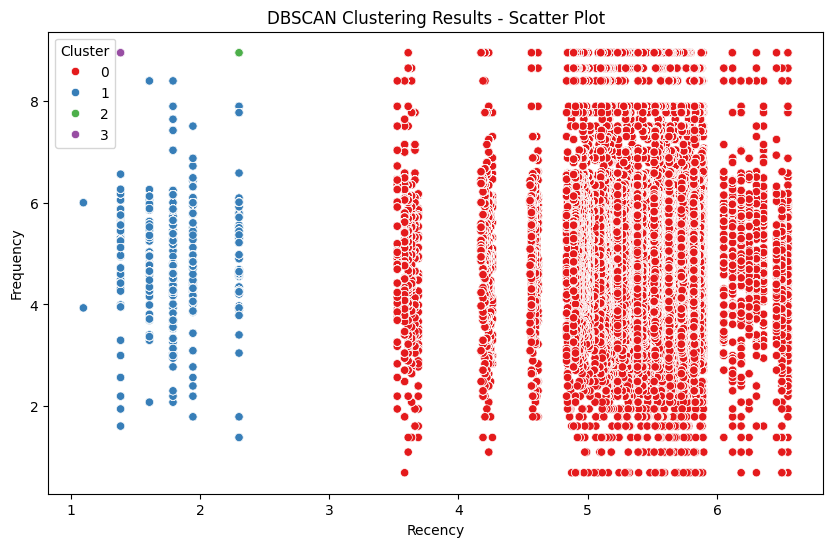

In [11]:

# Plotting a scatter plot for 'Recency' vs. 'Frequency'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_dbscan, x='LogRecency', y='LogFrequency', hue='DBSCAN_Cluster', palette='Set1')

# Adding labels and title
plt.title('DBSCAN Clustering Results - Scatter Plot')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')

# Show plot
plt.show()